In [1]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 3.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install plotly


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy, mysecrets,requests,base64,webbrowser,json,time
from urllib.parse import urlencode
from spotipy.oauth2 import SpotifyClientCredentials 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [70]:
client_id = mysecrets.client_id
client_secret = mysecrets.client_secret

auth_headers = {
    "client_id": client_id,
    "response_type": "code",
    "redirect_uri": "http://localhost:7777/callback",
    "scope": "user-library-read"
} 

In [71]:
webbrowser.open("https://accounts.spotify.com/authorize?" + urlencode(auth_headers))

True

In [73]:
code = "AQDRQnieV0ePJOezQzaiG5y65fuXzQlomjMgdDxZpOkEznikLXJPLNORVvasA_mMKeUV4PL_nfsuy7E_oreFE4AB313uJQ4OZuP9JnpAhtx4_kPdjngLN85C7uuJ32fpuQTYwwzzBHCrIBfbW10mH9R5x3dBcsXDp6j1AS-7GEq8TyBAKSOmpE61ouGCffkRtGYVvV8"

In [74]:
encoded_credentials = base64.b64encode(client_id.encode() + b':' + client_secret.encode()).decode("utf-8")

token_headers = {
    "Authorization": "Basic " + encoded_credentials,
    "Content-Type": "application/x-www-form-urlencoded"
}

token_data = {
    "grant_type": "authorization_code",
    "code": code,
    "redirect_uri": "http://localhost:7777/callback"
}

r = requests.post("https://accounts.spotify.com/api/token", data = token_data, headers = token_headers)

In [75]:
token = r.json()["access_token"]

print(token)

BQCZWxC1G1LgXZTwvsHFeBX2j_2SMHiI4HgbzvY0r1homva7FfNmL_ekLBFu63QOIDPkpXbvZLbZrtBHAnyd3l36sjqc7kiA9jaqr9caKmUn5Ylub9KwNxB35-MonBYSUEbvSE09j_enDMhWzV0AwLn3C7pkIB7CpwsFJzcJAbeJv7ivgVTrluzp0Qt7LRLz


In [91]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [77]:
playlist_uri = {
 "mp2015" : "7eBMr6C6GgyUdphppfsHGG",
 "mp2016" : "5s30jHYXIa8pqpZ5llc8UW",
 "mp2017" : "0y3DRV98utNLVxPkFUHr60",
 "mp2018" : "4oICEU7lJwh5B1bi11Fl81",
 "mp2019" : "0A6Mf0tkJTZyvoMBq29dzP",
 "mp2020" : "1LNWFkUgYkCcqhjl1zArEJ",
 "mp2021" : "2my6pETpT9mbvgUmbbE123",
 "mp2022" : "08hpQsg5CMFiO8zngrxBwm"
}

playlist_uri2 = {
 "mp2015" : "7eBMr6C6GgyUdphppfsHGG",
 "mp2016" : "5s30jHYXIa8pqpZ5llc8UW"
}

In [96]:
playlist_spot = {
 "sp2015" : "37i9dQZF1DX9ukdrXQLJGZ",
 "sp2016" : "37i9dQZF1DX8XZ6AUo9R4R",
 "sp2017" : "37i9dQZF1DWTE7dVUebpUW",
 "sp2018" : "37i9dQZF1DXe2bobNYDtW8",
 "sp2019" : "37i9dQZF1DWVRSukIED0e9",
 "sp2020" : "2fmTTbBkXi8pewbUvG3CeZ",
 "sp2021" : "5GhQiRkGuqzpWZSE7OU4Se",
 "sp2022" : "37i9dQZF1DXcBWIGoYBM5M"
}

In [88]:
def get_track_id(user,playlist_id):
    track_id = []
    playlist = sp.user_playlist(user,playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        track_id.append(get_features(track['id']))
    return track_id

In [89]:
def get_features(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    
    #song information
    name = track_info['name']
    album = track_info['album']['name']
    artist = track_info['album']['artists'][0]['name']
    release_date = track_info['album']['release_date']
    duration = track_info['duration_ms']
    popularity = track_info['popularity']
    
    #song audio features
    
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, album, artist, release_date, duration, popularity, acousticness,
                  danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [58]:
    
SpotifyPlaylist = pd.DataFrame(columns = ['Year','Title', 'Album', 'Artist', 'Release_Date', 'Duration', 'Popularity', 'Acousticness',
                  'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness','Tempo', 'Time_Signature'])

for year, uri in playlist_uri.items():
    time.sleep(.3)
    track_list = get_track_id("spotify",uri)
    yoyplaylist = pd.DataFrame(track_list, columns = ['Title', 'Album', 'Artist', 'Release_Date', 'Duration', 'Popularity', 'Acousticness',
                  'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness','Tempo', 'Time_Signature'])
    yoyplaylist['Year'] = year[-4:]
    playlist = pd.concat([playlist,yoyplaylist])

playlist.head(3)


,Year,Title,Album,Artist,Release_Date,Duration,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature
0,2015,679 (feat. Remy Boyz),679 (feat. Remy Boyz),Fetty Wap,2015-06-29,196693,74,0.00256,0.618,0.717,0.000000,0.625,-5.738,0.3180,190.050,4
1,2015,Lean On,Lean On,Major Lazer,2015-03-02,176561,0,0.00339,0.713,0.790,0.000868,0.485,-4.602,0.0574,98.011,4
2,2015,Trap Queen,Trap Queen,Fetty Wap,2014-12-15,222093,42,0.02440,0.746,0.873,0.000000,0.354,-3.803,0.1280,148.075,4


In [92]:
    
playlist2 = pd.DataFrame(columns = ['Year','Title', 'Album', 'Artist', 'Release_Date', 'Duration', 'Popularity', 'Acousticness',
                  'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness','Tempo', 'Time_Signature'])

for year, uri in playlist_spot.items():
    time.sleep(.3)
    track_list = get_track_id("spotify",uri)
    yplaylist = pd.DataFrame(track_list, columns = ['Title', 'Album', 'Artist', 'Release_Date', 'Duration', 'Popularity', 'Acousticness',
                  'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness','Tempo', 'Time_Signature'])
    yplaylist['Year'] = year[-4:]
    playlist2 = pd.concat([playlist2,yplaylist])

playlist2.head(3)

,Year,Title,Album,Artist,Release_Date,Duration,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature
0,2015,Uptown Funk (feat. Bruno Mars),Uptown Special,Mark Ronson,2015-01-12,269666,83,0.00801,0.856,0.609,0.000082,0.0344,-7.223,0.0824,114.988,4
1,2015,Thinking out Loud,x (Deluxe Edition),Ed Sheeran,2014-06-21,281560,83,0.47400,0.781,0.445,0.000000,0.1840,-6.061,0.0295,78.998,4
2,2015,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Wiz Khalifa,2015,229525,82,0.36900,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,4


In [97]:
playlist.to_csv('MyTracks.csv')
playlist2.to_csv('SpotifyTracks.csv')

In [4]:
spot = pd.read_csv('SpotifyTracks.csv')
mp = pd.read_csv('MyTracks.csv')

In [5]:
mypop = mp.groupby("Year")["Popularity"].mean()
mypop.head(10)

Year
2015    58.269231
2016    57.526000
2017    51.893617
2018    49.130000
2019    40.550000
2020    45.580000
2021    58.000000
2022    57.500000
Name: Popularity, dtype: float64

In [6]:
spotpop = spot.groupby("Year")["Popularity"].mean()
spotpop.head(10)

Year
2015    75.24
2016    74.14
2017    77.73
2018    75.83
2019    76.85
2020    66.16
2021    67.70
2022    89.82
Name: Popularity, dtype: float64

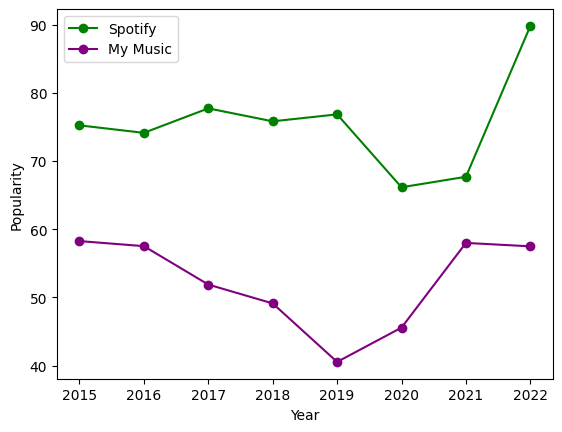

In [7]:
spotpop.plot(label = 'Spotify', marker = 'o', color = 'green')
mypop.plot(label = 'My Music', marker = 'o', color = 'purple')

plt.xlabel('Year')
plt.ylabel('Popularity')


plt.legend()

# show graph
plt.show()

In [8]:
myfeats = pd.DataFrame(mp,
                  columns = ['Popularity', 'Acousticness',
                  'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness','Tempo'])
 
spotfeats = pd.DataFrame(spot,
                  columns = ['Popularity', 'Acousticness',
                  'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness','Tempo'])
 

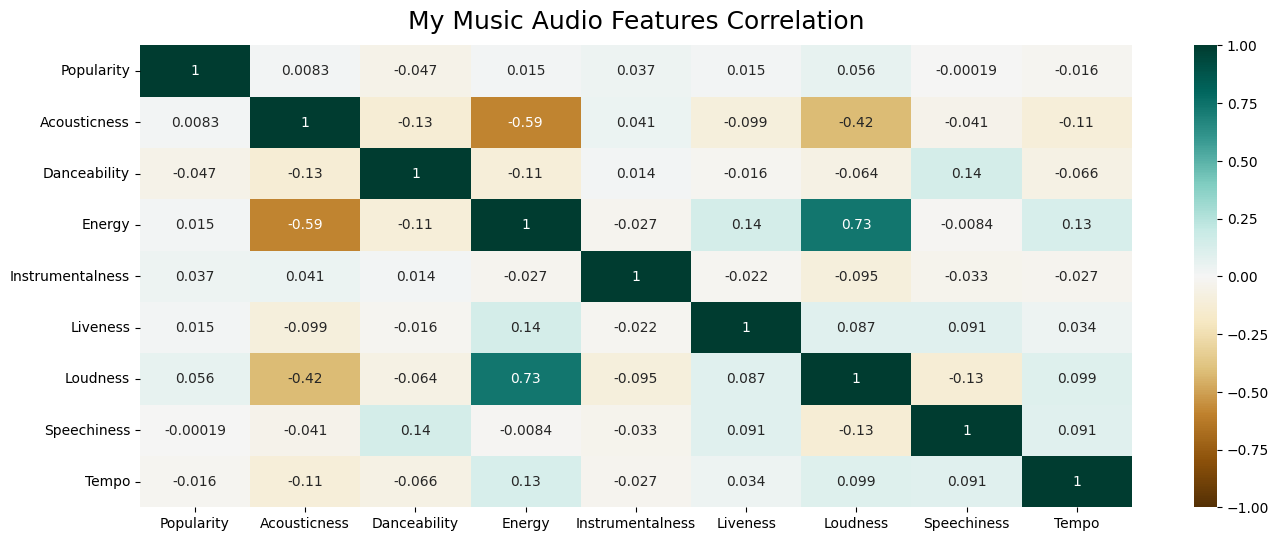

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(myfeats.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('My Music Audio Features Correlation', fontdict={'fontsize':18}, pad=12);

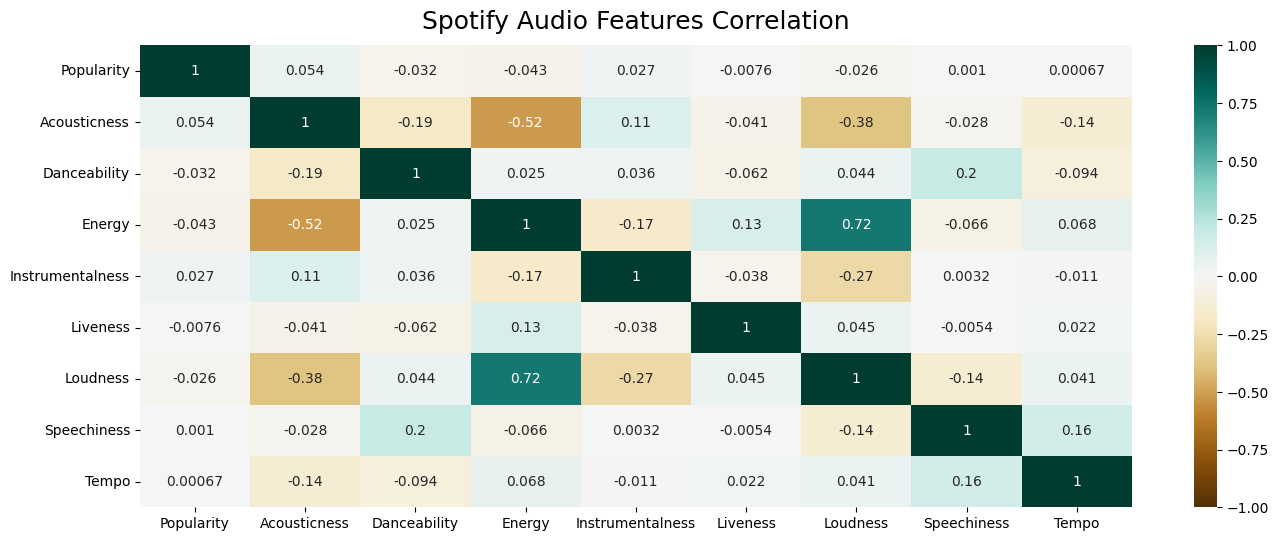

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(spotfeats.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Spotify Audio Features Correlation', fontdict={'fontsize':18}, pad=12);

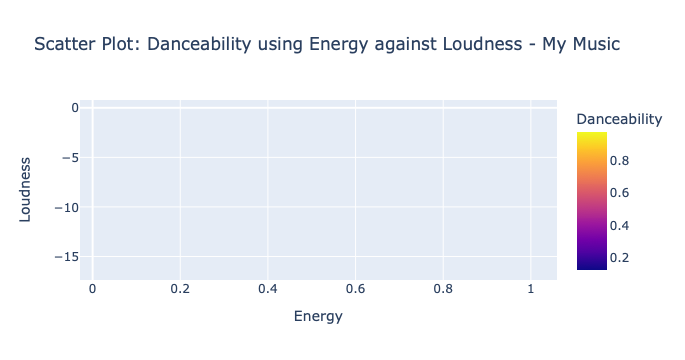

In [13]:
fig = px.scatter(myfeats, x = myfeats['Energy'], y = myfeats['Loudness'], color = myfeats['Danceability'], 
                 size = myfeats['Danceability'], title = 'Scatter Plot: Danceability using Energy against Loudness - My Music')

fig.show()

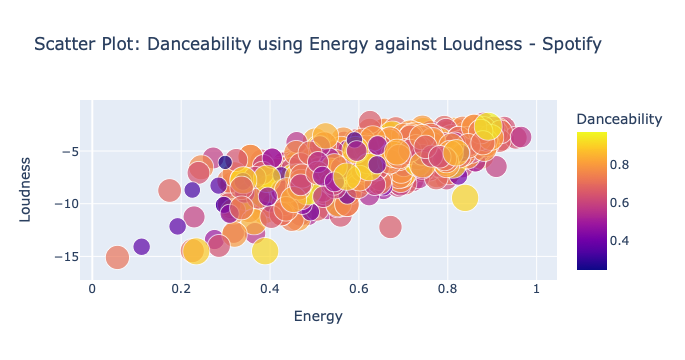

In [14]:
fig = px.scatter(spotfeats, x = spotfeats['Energy'], y = spotfeats['Loudness'], color = spotfeats['Danceability'], 
                 size = spotfeats['Danceability'], title = 'Scatter Plot: Danceability using Energy against Loudness - Spotify')

fig.show()

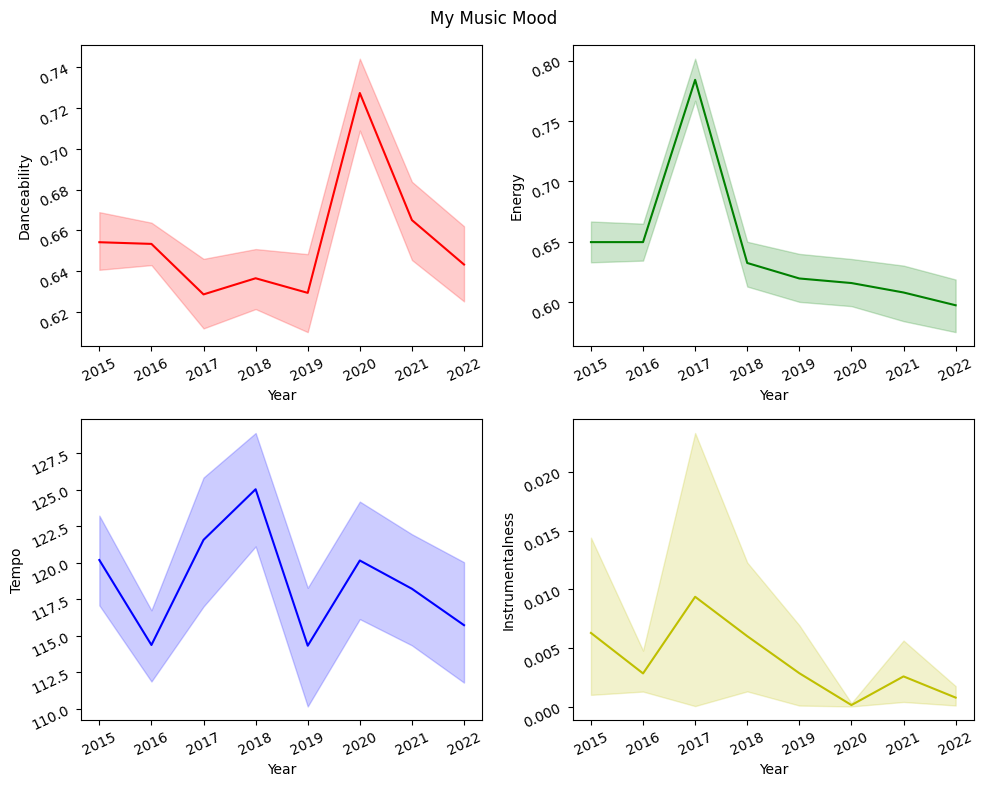

In [28]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 10, 8))
fig.suptitle('My Music Mood') 
sns.lineplot( x = "Year", y = "Danceability", 
             color = 'r', data = mp, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Year", y = "Energy", 
             color = 'g', data = mp,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Year", y = "Tempo", 
             color = 'b', data = mp,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Year", y = "Instrumentalness", 
             color = 'y', data = mp, 
             ax = ax[1][1])

ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)



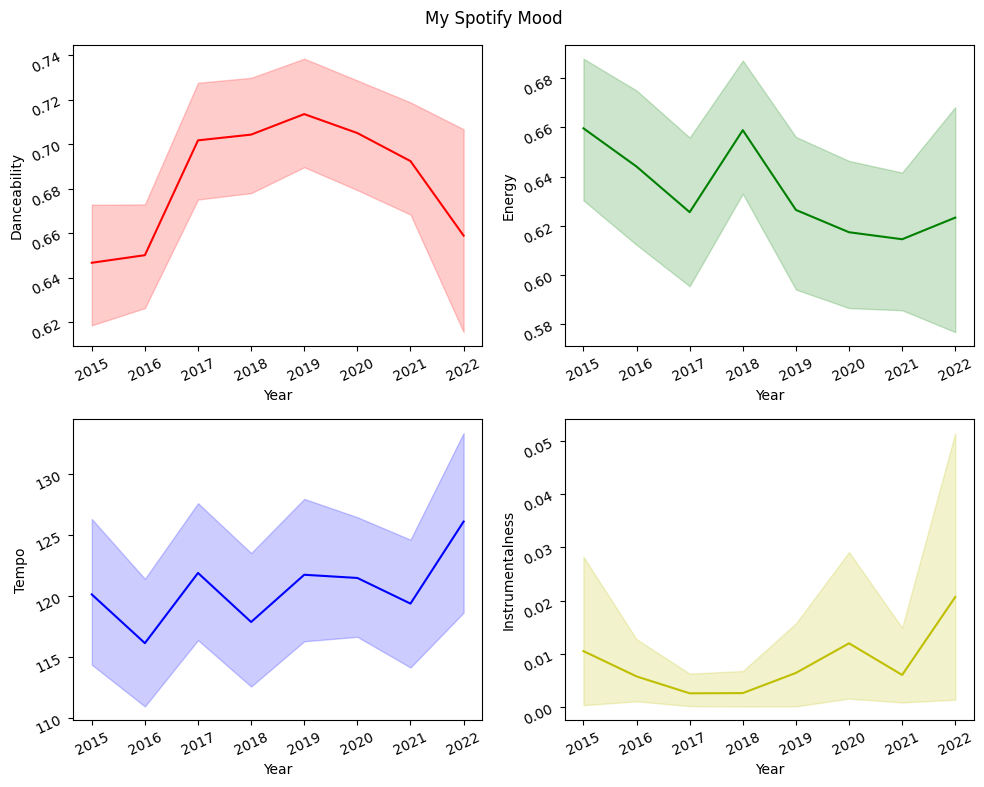

In [29]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 10, 8))
fig.suptitle('My Spotify Mood') 
sns.lineplot( x = "Year", y = "Danceability", 
             color = 'r', data = spot, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Year", y = "Energy", 
             color = 'g', data = spot,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Year", y = "Tempo", 
             color = 'b', data = spot,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Year", y = "Instrumentalness", 
             color = 'y', data = spot, 
             ax = ax[1][1])

ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)